In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-generated-text-detection/AI generated fake text detection.csv


In [2]:
df=pd.read_csv('../input/ai-generated-text-detection/AI generated fake text detection.csv')
df.head()

,Timestamp,Original text,ChatGPT Generated Text,Google Bard Generated Text
0,8/11/2023 0:55:39,"In this paper, we consider the transmission of...",This paper explores the transmission of confid...,"In this paper, we study the secure transmissio..."
1,8/11/2023 0:57:27,Wireless transmission frequently deals with ch...,Channels exhibiting multipath fading are a com...,Wireless transmission often encounters channel...
2,8/11/2023 0:58:39,A range of relatively simple and accurate stat...,Scientists have put forth a variety of statist...,Scientists have proposed a variety of relative...
3,8/11/2023 1:00:01,A statistical model was established in [1] whe...,"In reference [1], a statistical model was form...","In [1], a statistical model was developed that..."
4,8/11/2023 1:01:33,Barros and Rodrigues characterized secrecy cap...,"In their work [2], Barros and Rodrigues introd...","In [2], Barros and Rodrigues defined secrecy c..."


**Data Preprocessing**

In [3]:
##create a new dataset which have two features one is for text another is for label which is 0 or 1, 0 is for orginal text and 1 is for AI text
data = pd.DataFrame(columns=['Text','Label'])
data

,Text,Label


In [4]:
df = pd.DataFrame(df)

Append Original text from dataset

In [5]:
for datas in df['Original text ']:
    data = data._append({'Text': datas,'Label': 0},ignore_index=True)

data

,Text,Label
0,"In this paper, we consider the transmission of...",0
1,Wireless transmission frequently deals with ch...,0
2,A range of relatively simple and accurate stat...,0
3,A statistical model was established in [1] whe...,0
4,Barros and Rodrigues characterized secrecy cap...,0
...,...,...
611,If we want to predict the labels of instances ...,0
612,"In this section, we analyze the distinct trait...",0
613,"When Anthracnose is present, black necrotic pa...",0
614,"In most cases, necrotic patches form along the...",0


In [37]:
##Append AI Generated Text from df
for datas in df['ChatGPT Generated Text']:
    data = data._append({'Text': datas,'Label': 1},ignore_index=True)
    
for datas in df['Google Bard Generated Text']:
    data = data._append({'Text': datas,'Label': 1},ignore_index=True)

In [39]:
data

,Text,Label
0,"In this paper, we consider the transmission of...",0
1,Wireless transmission frequently deals with ch...,0
2,A range of relatively simple and accurate stat...,0
3,A statistical model was established in [1] whe...,0
4,Barros and Rodrigues characterized secrecy cap...,0
...,...,...
2459,For effective prediction of labels using a mac...,1
2460,"In this section, we examine the unique charact...",1
2461,"In the presence of Anthracnose, black necrotic...",1
2462,"In the majority of cases, necrotic patches dev...",1


In [40]:
## Get the Independent Features
X=data.drop('Label',axis=1)
X

,Text
0,"In this paper, we consider the transmission of..."
1,Wireless transmission frequently deals with ch...
2,A range of relatively simple and accurate stat...
3,A statistical model was established in [1] whe...
4,Barros and Rodrigues characterized secrecy cap...
...,...
2459,For effective prediction of labels using a mac...
2460,"In this section, we examine the unique charact..."
2461,"In the presence of Anthracnose, black necrotic..."
2462,"In the majority of cases, necrotic patches dev..."


In [41]:
## Get the Dependent features
y=data['Label']
y

0       0
1       0
2       0
3       0
4       0
       ..
2459    1
2460    1
2461    1
2462    1
2463    1
Name: Label, Length: 2464, dtype: object

In [42]:
data.shape

(2464, 2)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Text Preprocessing

In [44]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
corpus[3]

'statist model establish peak multipath respons analyz statist consid medium linear filter'

In [47]:
## Applying TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [48]:
X.shape

(2464, 5000)

In [49]:
y=data['Label']

In [50]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [51]:
tfidf_v.get_params()# things what you have applied in tfidf

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [52]:
tfidf_v.get_feature_names_out()

array(['abil', 'abl', 'abort', ..., 'zoom', 'zoom rotat',
       'zoom rotat oper'], dtype=object)

In [53]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [54]:
count_df.head()

,abil,abl,abort,absenc,abund,acceler,access,accommod,account,accur,...,zhang,zhang et,zhang et al,zhou,zhou et,zhou et al,zone,zoom,zoom rotat,zoom rotat oper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
import matplotlib.pyplot as plt

In [56]:
# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model Selection and model building

In [57]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [58]:
from sklearn import metrics
import numpy as np
import itertools

In [59]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Accuracy: 0.737


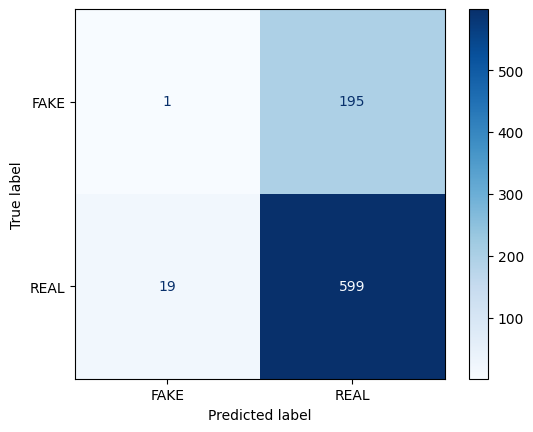

In [60]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Assuming you have X_train, X_test, y_train, y_test ready

# Create a classifier
classifier = MultinomialNB()

# Fit the classifier
classifier.fit(X_train, y_train)

# Make predictions
pred = classifier.predict(X_test)

# Calculate accuracy
score = accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FAKE', 'REAL'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [61]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7371007371007371

In [62]:
y_train.shape

(1650,)

In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.638
Confusion matrix, without normalization


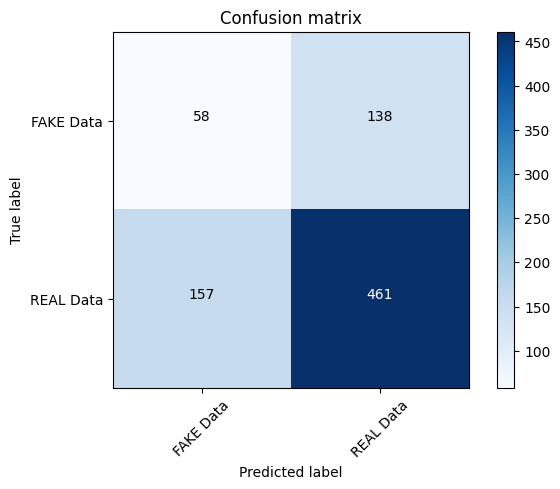

In [64]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [65]:
# Assuming you have already loaded and processed your data, and you have 'classifier', 'tfidf_v', and 'ps' available

# Get user input
user_input = input("Enter a paragraph: ")

# Preprocess the user input
review = re.sub('[^a-zA-Z]', ' ', user_input)
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)

# Transform the preprocessed user input using TF-IDF
user_input_vector = tfidf_v.transform([review])

# Predict originality (0 for original, 1 for AI-generated)
prediction = classifier.predict(user_input_vector)[0]

# Get the predicted probability for originality
prediction_proba = classifier.predict_proba(user_input_vector)[0][0] if prediction == 0 else classifier.predict_proba(user_input_vector)[0][1]

# Calculate percentage of originality
originality_percentage = (prediction_proba) * 100

if prediction == 0:
    print(f"The input is {originality_percentage:.2f}% original.")
else:
    print(f"The input is {originality_percentage:.2f}% AI-generated.")


Enter a paragraph:  Artificial Intelligence (AI) stands at the forefront of technological innovation, revolutionizing the way we interact with the world around us. It encompasses a wide range of techniques that enable machines to mimic human intelligence, learn from data, and perform tasks that once seemed reserved for human minds alone. AI systems are designed to perceive their environment, reason about situations, and make informed decisions to achieve specific goals.


The input is 91.33% AI-generated.
